In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
model = load_model("food_classifier.h5")


In [3]:
import csv

# Path to your CSV file
csv_file = './indian_food_named_calories.csv'

# Dictionary to store food names and their calories
food_calories = {}

# Open the CSV file and read it
with open(csv_file, mode='r', encoding='utf-8') as file:
    csv_reader = csv.reader(file)
    
    # Skip header if present
    next(csv_reader)
    
    # Iterate through each row and populate the dictionary
    for row in csv_reader:
        food_name = row[0]  # Food name is in the first column
        calories = float(row[1])  # Calories in the second column
        food_calories[food_name] = calories

# Print the dictionary to verify
print(food_calories)


{'adhirasam': 477.75, 'aloo_gobi': 157.44, 'aloo_matar': 285.08, 'aloo_methi': 370.88, 'aloo_shimla_mirch': 247.77, 'aloo_tikki': 441.68, 'anarsa': 381.63, 'ariselu': 143.86, 'bandar_laddu': 378.5, 'basundi': 209.92, 'bhatura': 174.15, 'bhindi_masala': 169.59, 'biryani': 111.38, 'boondi': 303.24, 'butter_chicken': 555.51, 'chak_hao_kheer': 311.54, 'cham_cham': 387.83, 'chana_masala': 360.25, 'chapati': 441.41, 'chhena_kheeri': 214.47, 'chicken_razala': 490.75, 'chicken_tikka': 591.36, 'chicken_tikka_masala': 386.89, 'chikki': 327.03, 'daal_baati_churma': 111.7, 'daal_puri': 381.52, 'dal_makhani': 404.35, 'dal_tadka': 560.02, 'dharwad_pedha': 224.08, 'doodhpak': 467.78, 'double_ka_meetha': 150.94, 'dum_aloo': 435.03, 'gajar_ka_halwa': 387.69, 'gavvalu': 239.29, 'ghevar': 282.54, 'gulab_jamun': 471.93, 'imarti': 192.95, 'jalebi': 235.22, 'kachori': 497.3, 'kadai_paneer': 209.15, 'kadhi_pakoda': 199.81, 'kajjikaya': 414.71, 'kakinada_khaja': 164.73, 'kalakand': 288.3, 'karela_bharta': 286

In [4]:
import os

dataset_dir = 'C:/Users/susha/code/Foodie/Indian Food Images/Indian Food Images'

# Get class names from folder names
class_names = sorted([
    folder for folder in os.listdir(dataset_dir)
    if os.path.isdir(os.path.join(dataset_dir, folder))
])
print(class_names)

['adhirasam', 'aloo_gobi', 'aloo_matar', 'aloo_methi', 'aloo_shimla_mirch', 'aloo_tikki', 'anarsa', 'ariselu', 'bandar_laddu', 'basundi', 'bhatura', 'bhindi_masala', 'biryani', 'boondi', 'butter_chicken', 'chak_hao_kheer', 'cham_cham', 'chana_masala', 'chapati', 'chhena_kheeri', 'chicken_razala', 'chicken_tikka', 'chicken_tikka_masala', 'chikki', 'daal_baati_churma', 'daal_puri', 'dal_makhani', 'dal_tadka', 'dharwad_pedha', 'doodhpak', 'double_ka_meetha', 'dum_aloo', 'gajar_ka_halwa', 'gavvalu', 'ghevar', 'gulab_jamun', 'imarti', 'jalebi', 'kachori', 'kadai_paneer', 'kadhi_pakoda', 'kajjikaya', 'kakinada_khaja', 'kalakand', 'karela_bharta', 'kofta', 'kuzhi_paniyaram', 'lassi', 'ledikeni', 'litti_chokha', 'lyangcha', 'maach_jhol', 'makki_di_roti_sarson_da_saag', 'malapua', 'misi_roti', 'misti_doi', 'modak', 'mysore_pak', 'naan', 'navrattan_korma', 'palak_paneer', 'paneer_butter_masala', 'phirni', 'pithe', 'poha', 'poornalu', 'pootharekulu', 'qubani_ka_meetha', 'rabri', 'ras_malai', 'ras

In [5]:
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)  # Load image and resize
    img_array = image.img_to_array(img)                      # Convert to array
    img_array = img_array / 255.0                            # Normalize (if trained that way)
    return np.expand_dims(img_array, axis=0), img_array      # Add batch dim, also return original


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


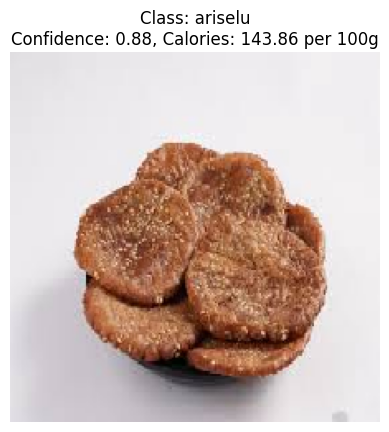

In [10]:
# Set path to your image
img_path = "./test3.jpg"
# Load image
input_image, display_image = load_and_preprocess_image(img_path)

# Predict
prediction = model.predict(input_image)
predicted_index = np.argmax(prediction)
predicted_class = class_names[predicted_index]
confidence = prediction[0][predicted_index]
calories = food_calories.get(predicted_class, "Unknown")

# Show result
plt.imshow((display_image*255).astype("uint8"))  # Assumes original image is 0-255
plt.axis('off')
plt.title(f"Class: {predicted_class}\nConfidence: {confidence:.2f}, Calories: {calories} per 100g")
plt.show()
